<a href="https://colab.research.google.com/github/VCosmo/POLOSA/blob/main/UniLike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.integrate as spi
from matplotlib import cm

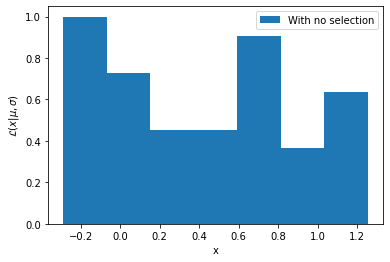

In [67]:
N = 50
m =-0.3
M= 1.3

samples = np.random.uniform(m, M, N)
_=plt.hist(samples,bins='auto',density='True',label='With no selection') 

plt.xlabel('x')
plt.ylabel(r'$\mathcal{L}(x|\mu,\sigma)$')
plt.legend()

In [63]:
def uni_like(a, b, x):
    if np.all(x >= a) and np.all(x <= b):
        return 1 / (b - a)**len(x)
    else:
        return 0

In [58]:
def selection(a, a_max, b_min, b, min, max):
    f_uniform = lambda x, y: ((a_max - x)*(y - b_min))  
    return spi.dblquad(f_uniform, a, a_max, b_min, b)[0]

<ipython-input-68-d6d4867cd8f2>:32: RuntimeWarning: invalid value encountered in true_divide
  b_final = np.divide(b_posterior, I)


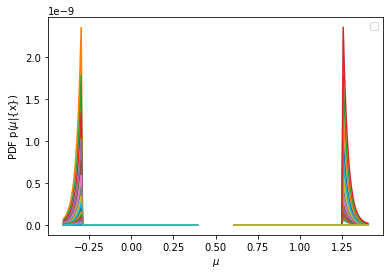

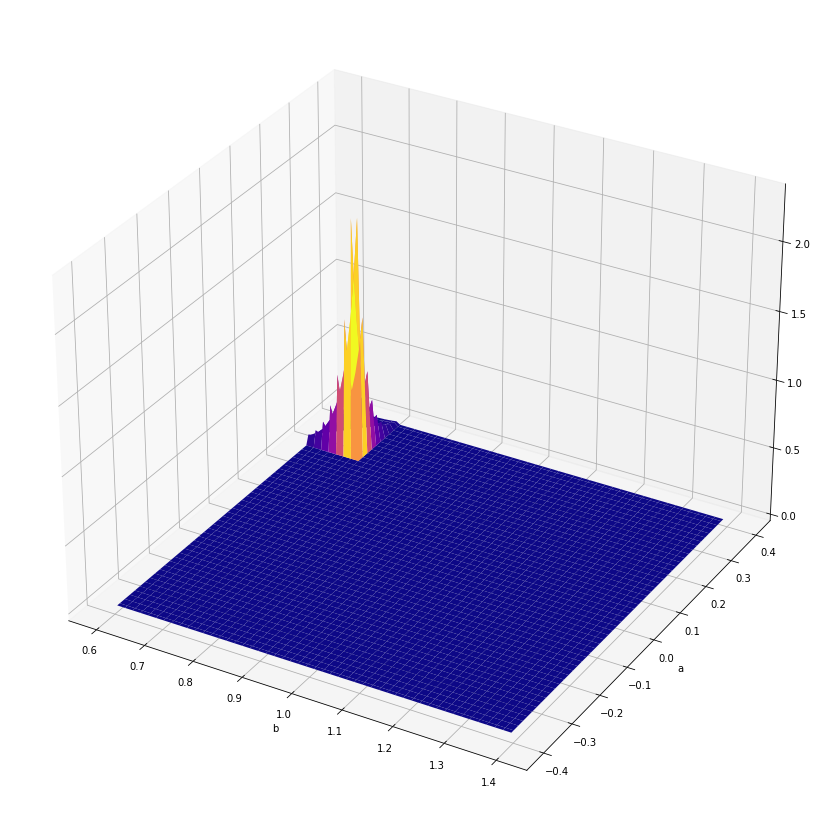

In [68]:
dim_a = 100
dim_b = 100
a_min, a_max = -0.4, 0.4
b_min, b_max = 0.6, 1.4

b_array = np.linspace(b_min, b_max, dim_b)         #tables
a_array = np.linspace(a_min, a_max, dim_a)

b_posterior = np.zeros((dim_a, dim_b))  
I = np.ones((dim_a,dim_b))

while len(samples)<N:
      x=np.random.uniform(m, M, N)
      if (x>=b_min): #x belongs to [x_thr;infinity[ 
          samples.append(x)
      if (x<=a_max):
          samples.append(x)
        
samples=np.array(samples)

for i, a_el in enumerate(a_array):                 #selection
    for j, b_el in enumerate(b_array):
      #print(a_el, b_el)
      I[i][j] = selection(a_el, a_max, b_min, b_el, m, M)


for i in range(len(a_array)):                      #likelihood
    for j in range(len(b_array)):
       b_posterior[i][j] = uni_like(a_array[i], b_array[j], samples) 
       

b_final = np.divide(b_posterior, I)                

plt.plot(b_array, b_final.T, alpha=1)
plt.legend()
plt.xlabel('$\mu$')
plt.ylabel('PDF p($\mu$|{x})')

plt.plot(a_array, b_final, alpha=1)
plt.legend()
plt.xlabel('$\mu$')
plt.ylabel('PDF p($\mu$|{x})')

X, Y = np.meshgrid(a_array, b_array)
fig = plt.figure(figsize=(15, 15))

ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(Y, X, b_final, cmap="plasma")
ax.set_xlabel('b')
ax.set_ylabel('a')
plt.show()

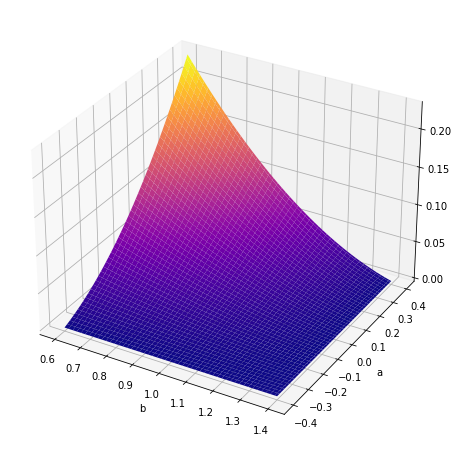

In [62]:
X, Y = np.meshgrid(a_array, b_array)
fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(Y, X, (I), cmap="plasma")
ax.set_xlabel('b')
ax.set_ylabel('a')
plt.show()